In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predicting bicycle traffic across Seattle's Fremont Bridge

The Fremont Bridge Bicycle Counter began operation in October 2012 and records the number of bikes that cross the bridge using the pedestrian/bicycle pathways.
The bicycle counter has sensors on the east and west sidewalks of the bridge.

<table><tr>
<td> <img src="fremont.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="fremont2.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

## Seattle's Fremont Bridge Dataset

Download the Fremont dataset from the [Seattle Open Data Portal](https://data.seattle.gov/)

In [2]:
'load the dataset'
name = 'Fremont_Bridge_Bicycle_Counter.csv'
Fremont = pd.read_csv(name, index_col='Date', parse_dates=True)
Fremont.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [3]:
'time range'
Fremont.index.max(), Fremont.index.min()

(Timestamp('2020-09-30 23:00:00'), Timestamp('2012-10-03 00:00:00'))

In [4]:
'drop Fremont Bridge East Sidewalk and Fremont Bridge West Sidewalk columns'
Fremont.drop(['Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk'],axis=1,inplace=True)
' change column names'
Fremont.columns = ['Total']
Fremont.head()

,Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0


In [5]:
'total daily bicycle traffic'
Fremont_daily = Fremont.resample('d').sum() 
Fremont_daily.head()

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0


Text(0.5, 1.0, 'Fremont Bridge bicycle traffic')

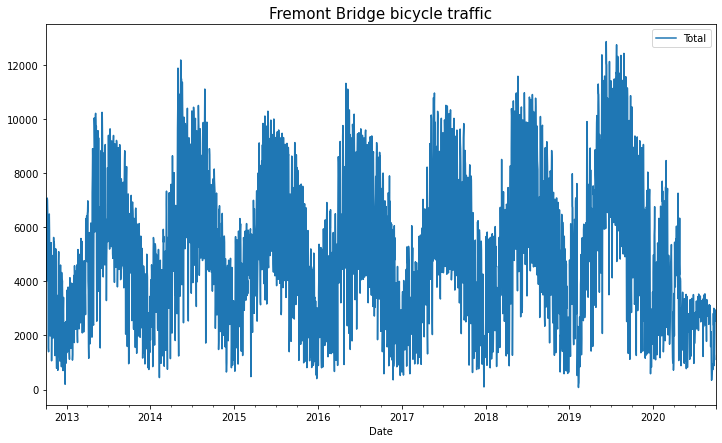

In [6]:
Fremont_daily.plot(figsize=(12,7))
plt.title('Fremont Bridge bicycle traffic',fontsize=15)

In [7]:
'add column that indicates the day of the week/month/year'
Fremont_daily['day_of_week'] = Fremont_daily.index.dayofweek

In [8]:
'add year column'
Fremont_daily['year'] = Fremont_daily.index.year

In [9]:
'add a column that indicates whether or not a day is a holiday'
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012-10-03 00:00:00','2020-09-30')
Fremont_daily = Fremont_daily.join(pd.Series(1, index=holidays,name='holiday'))
Fremont_daily['holiday'].fillna(0, inplace=True)

In [10]:
'add hours_of_daylight column'
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    'this function computes the hours of daylight for a particular date and latitude'
    days = (date-pd.to_datetime('2000-12-21')).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days*2*np.pi/365.25)))
    return 24.*np.degrees(np.arccos(1-np.clip(m,0,2,))) / 180

In [11]:
Fremont_daily['daylight_hrs'] = Fremont_daily.index.map(hours_of_daylight)
Fremont_daily.head()

,Total,day_of_week,year,holiday,daylight_hrs
Date,,,,,
2012-10-03,7042.0,2,2012,0.0,11.277359
2012-10-04,6950.0,3,2012,0.0,11.219142
2012-10-05,6296.0,4,2012,0.0,11.161038
2012-10-06,4012.0,5,2012,0.0,11.103056
2012-10-07,4284.0,6,2012,0.0,11.045208


Text(0.5, 1.0, 'hours of daylight')

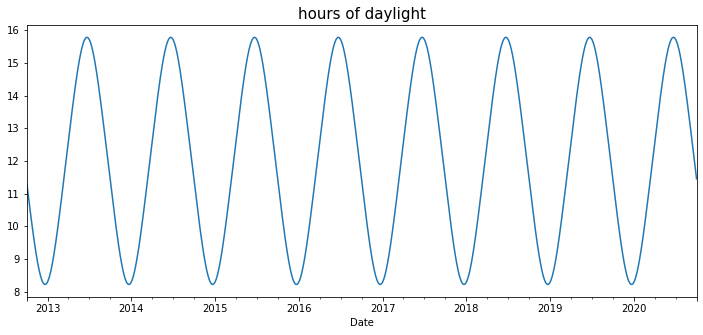

In [12]:
Fremont_daily.daylight_hrs.plot(figsize=(12,5))
plt.title('hours of daylight', fontsize=15)

## Weather dataset

Dayly weather data from the [NOAA](https://www.ncdc.noaa.gov/cdo-web/search). Station ID: USW00024233 (SEATTLE TACOMA AIRPORT).

In [13]:
weather = pd.read_csv('weather.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,10.0,20.0,23.0,28.0
2012-10-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,20.0,20.0,21.0,25.1
2012-10-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,360.0,360.0,17.9,21.9
2012-10-06,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",11.41,NaN,0.0,0.0,0.0,NaN,75,46,20.0,20.0,17.0,21.0
2012-10-07,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2.91,NaN,0.0,0.0,0.0,NaN,75,46,30.0,10.0,12.1,14.1


Columns:

- AWND = Average daily wind speed
- PGTM = Peak gust time (HHMM)
- PRCP = Precipitation
- SNOW = Snowfall 
- SNWD = Snow depth 
- TAVG = Average temperature
- TMAX = Maximum temperature
- TMIN = Maximum temperature
- WDF2 = Direction of fastest 2-minute wind (degrees)
- WDF5 = Direction of fastest 5-second wind (degrees)
- WSF2 = Fastest 2-minute wind speed (tenths of meters per second)
- WSF5 = Fastest 5-second wind speed (tenths of meters per second)

In [14]:
"missing values"
weather.isnull().sum()

STATION       0
NAME          0
AWND          1
PGTM       2837
PRCP          0
SNOW          0
SNWD          0
TAVG        181
TMAX          0
TMIN          0
WDF2          1
WDF5         33
WSF2          1
WSF5         33
dtype: int64

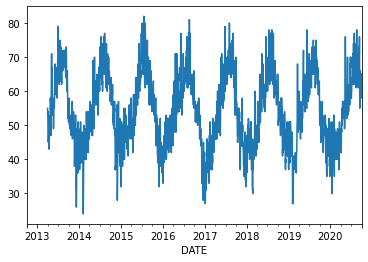

In [15]:
# TAVG column has some missing values 
weather.TAVG.plot()

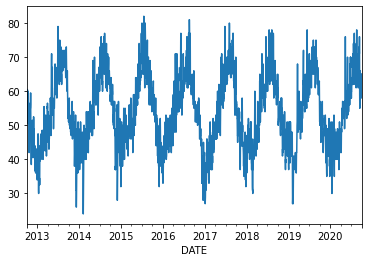

In [16]:
# fix TAVG column
weather.TAVG.fillna(0.5*(weather.TMAX+weather.TMIN), inplace=True)
weather.TAVG.plot()

In [17]:
# AWND has 1 missing value
weather[weather.AWND.isnull()]

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,
2020-09-07,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",NaN,NaN,0.0,0.0,0.0,70.0,84,61,NaN,NaN,NaN,NaN


In [18]:
# AWND one day before, and one day after
weather.loc['2020-09-06'].AWND,weather.loc['2020-09-08'].AWND

(7.83, 14.76)

In [19]:
mean = (7.83+14.76)/2
weather.AWND.fillna(mean,inplace=True)

In [20]:
'drop columns that we will not use'
weather.drop(['STATION','NAME','PGTM','SNWD','TMAX','TMIN', 'WDF2','WDF5','WSF2','WSF5'],axis=1, inplace=True)
weather.head()

,AWND,PRCP,SNOW,TAVG
DATE,,,,
2012-10-03,16.33,0.0,0.0,56.0
2012-10-04,14.54,0.0,0.0,56.5
2012-10-05,12.75,0.0,0.0,59.5
2012-10-06,11.41,0.0,0.0,60.5
2012-10-07,2.91,0.0,0.0,60.5


## Merge weather and daily traffic datasets

In [21]:
weather.head()

,AWND,PRCP,SNOW,TAVG
DATE,,,,
2012-10-03,16.33,0.0,0.0,56.0
2012-10-04,14.54,0.0,0.0,56.5
2012-10-05,12.75,0.0,0.0,59.5
2012-10-06,11.41,0.0,0.0,60.5
2012-10-07,2.91,0.0,0.0,60.5


In [22]:
Fremont_daily.head()

,Total,day_of_week,year,holiday,daylight_hrs
Date,,,,,
2012-10-03,7042.0,2,2012,0.0,11.277359
2012-10-04,6950.0,3,2012,0.0,11.219142
2012-10-05,6296.0,4,2012,0.0,11.161038
2012-10-06,4012.0,5,2012,0.0,11.103056
2012-10-07,4284.0,6,2012,0.0,11.045208


In [23]:
daily=Fremont_daily.join(weather)
daily.head()

,Total,day_of_week,year,holiday,daylight_hrs,AWND,PRCP,SNOW,TAVG
Date,,,,,,,,,
2012-10-03,7042.0,2,2012,0.0,11.277359,16.33,0.0,0.0,56.0
2012-10-04,6950.0,3,2012,0.0,11.219142,14.54,0.0,0.0,56.5
2012-10-05,6296.0,4,2012,0.0,11.161038,12.75,0.0,0.0,59.5
2012-10-06,4012.0,5,2012,0.0,11.103056,11.41,0.0,0.0,60.5
2012-10-07,4284.0,6,2012,0.0,11.045208,2.91,0.0,0.0,60.5


In [24]:
'set year 2020 aside'
daily_2020 = daily[daily.index>=pd.to_datetime('2020/01/01')]

In [25]:
'drop 2020'
daily = daily[daily.index<pd.to_datetime('2020/01/01')]
daily.tail()

,Total,day_of_week,year,holiday,daylight_hrs,AWND,PRCP,SNOW,TAVG
Date,,,,,,,,,
2019-12-27,2276.0,4,2019,0.0,8.237706,5.37,0.01,0.0,39.0
2019-12-28,1676.0,5,2019,0.0,8.245532,4.25,0.00,0.0,44.0
2019-12-29,1846.0,6,2019,0.0,8.254701,4.70,0.01,0.0,45.0
2019-12-30,3606.0,0,2019,0.0,8.265207,9.84,0.04,0.0,46.0
2019-12-31,2284.0,1,2019,0.0,8.277039,14.76,0.26,0.0,48.0


## A baseline linear model

In [26]:
y = daily['Total'] # target vector
X = daily[['day_of_week','year','holiday','daylight_hrs','AWND','PRCP','SNOW','TAVG']] # feature matrix

In [27]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
# column preprocessor
processor = ColumnTransformer(transformers = [
    ('encoder', OneHotEncoder(), ['day_of_week','holiday'])],
    remainder='passthrough') 

In [29]:
# pipeline
pipe = Pipeline(steps=[
    ('processor', processor),
    ('reg', LinearRegression())
])

In [30]:
pipe.fit(X, y)

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['day_of_week',
                                                   'holiday'])])),
                ('reg', LinearRegression())])

In [31]:
# compute predictions
daily['predicted'] = pipe.predict(X)

Text(0.5, 1.0, 'daily traffic')

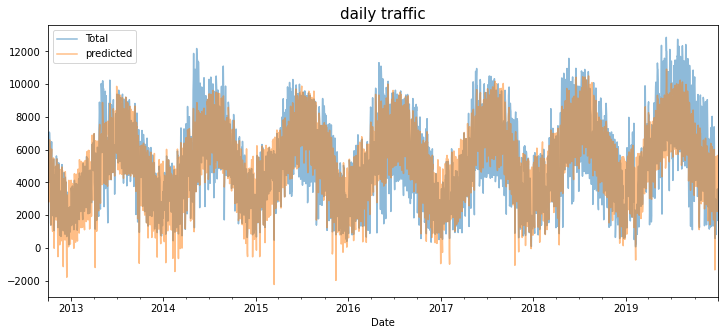

In [32]:
# plot actual and predicted values
daily[['Total','predicted']].plot(alpha=0.5, figsize=(12,5))
plt.title('daily traffic',fontsize=15)

Text(0.5, 1.0, 'monthly traffic')

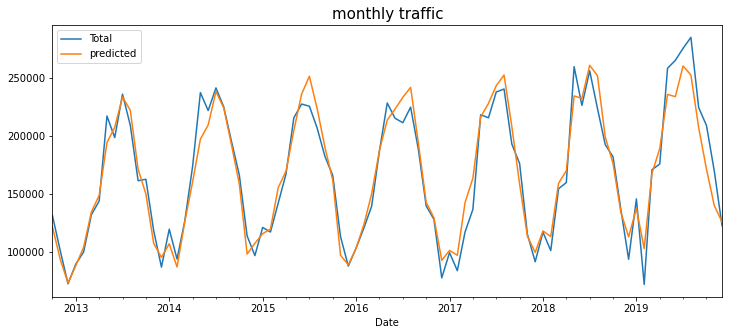

In [33]:
'plot actual and predicted monthly values'
daily[['Total','predicted']].resample('m').sum().plot(figsize=(12,5))
plt.title('monthly traffic',fontsize=15)

Text(0.5, 1.0, 'yearly traffic')

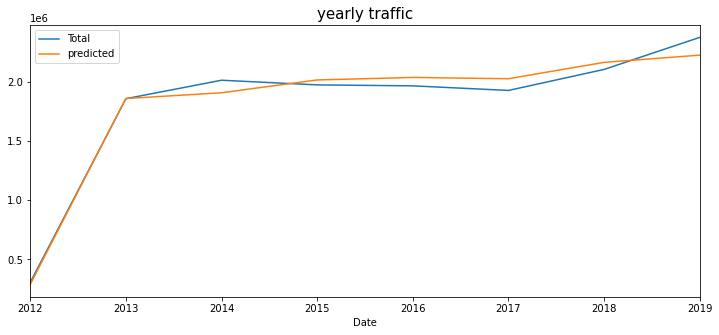

In [34]:
'plot actual and predicted yearly values'
daily[['Total','predicted']].resample('y').sum().plot(figsize=(12,5))
plt.title('yearly traffic',fontsize=15)

**Model coefficients**

In [36]:
# feature names
feature_names = list(pipe['processor'].named_transformers_['encoder'].get_feature_names(['day_of_week','holiday']))+['year','daylight_hrs','AWND','PRCP','SNOW','TAVG']
feature_names

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'holiday_0.0',
 'holiday_1.0',
 'year',
 'daylight_hrs',
 'AWND',
 'PRCP',
 'SNOW',
 'TAVG']

In [37]:
# coefficients
coefficients = pipe['reg'].coef_
coefficients

array([ 1140.21140106,  1348.91163511,  1268.95614976,   985.64942658,
         329.38306948, -2446.20233691, -2626.90934508,  1219.65054178,
       -1219.65054178,   177.23306726,   241.82726645,   -74.96506078,
       -2081.45723883,  -225.93650458,    92.17685249])

In [38]:
coeff_df = pd.DataFrame(coefficients, feature_names, columns=['coefficient'])
coeff_df

,coefficient
day_of_week_0,1140.211401
day_of_week_1,1348.911635
day_of_week_2,1268.956150
day_of_week_3,985.649427
day_of_week_4,329.383069
day_of_week_5,-2446.202337
day_of_week_6,-2626.909345
holiday_0.0,1219.650542
holiday_1.0,-1219.650542
year,177.233067


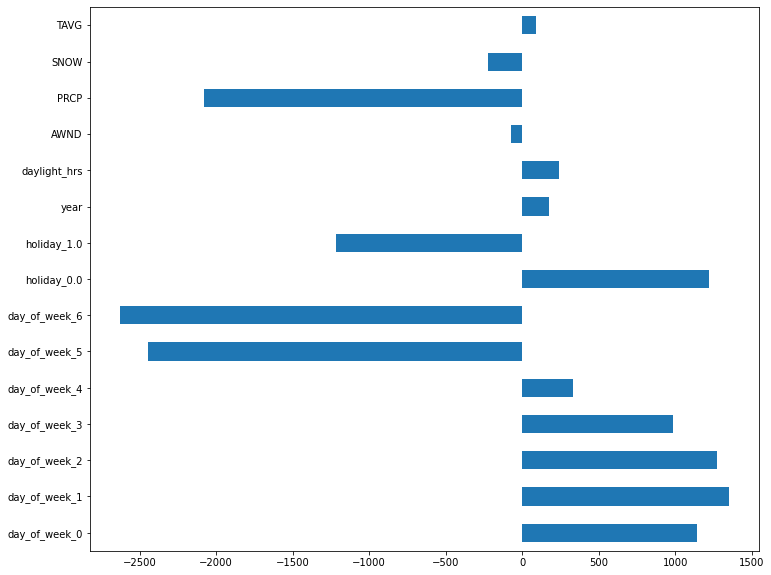

In [39]:
plt.figure(figsize=(12,10))
coeff_df.coefficient.plot(kind='barh',figsize=(12,10))

## An improved linear model

In [69]:
# column preprocessor
processor = ColumnTransformer(transformers = [
    ('encoder', OneHotEncoder(), ['day_of_week','holiday'])],
    remainder=StandardScaler()) 

# pipeline
pipe = Pipeline(steps=[
    ('processor', processor),
    ('poly_features',PolynomialFeatures(degree=3,include_bias=False)),
    ('reg', Ridge(alpha=1))
])

In [70]:
pipe.fit(X, y)

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['day_of_week',
                                                   'holiday'])])),
                ('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', Ridge(alpha=1))])

In [71]:
# compute predictions
daily['predicted'] = pipe.predict(X)

Text(0.5, 1.0, 'daily traffic')

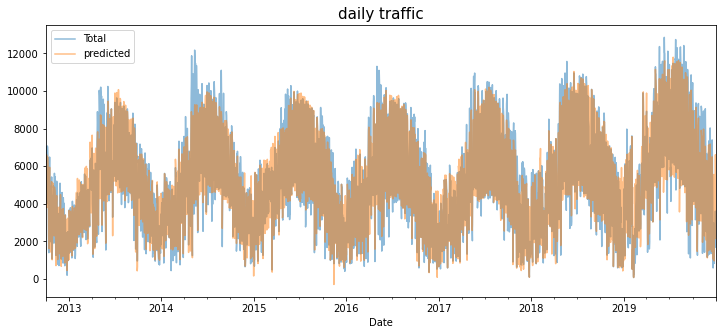

In [72]:
# plot actual and predicted values
daily[['Total','predicted']].plot(alpha=0.5, figsize=(12,5))
plt.title('daily traffic',fontsize=15)

Text(0.5, 1.0, 'monthly traffic')

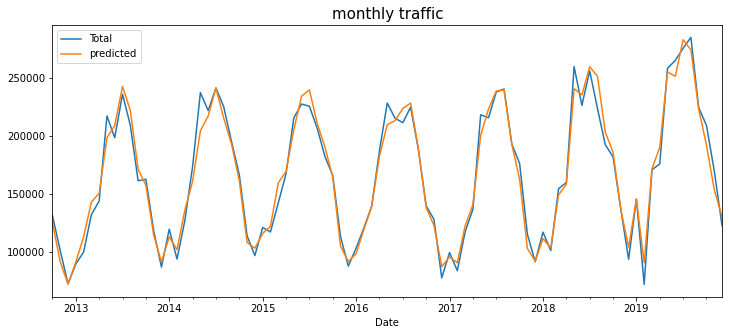

In [73]:
'plot actual and predicted monthly values'
daily[['Total','predicted']].resample('m').sum().plot(figsize=(12,5))
plt.title('monthly traffic',fontsize=15)

Text(0.5, 1.0, 'yearly traffic')

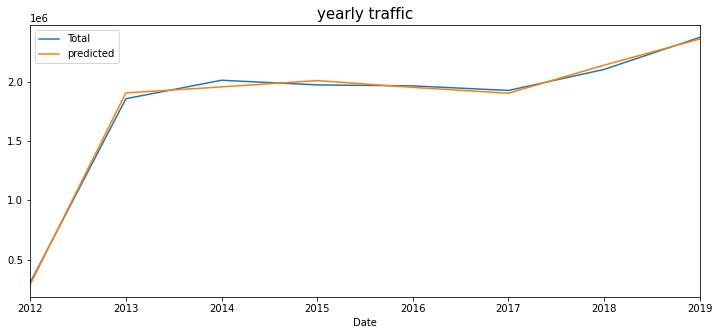

In [74]:
'plot actual and predicted monthly values'
daily[['Total','predicted']].resample('y').sum().plot(figsize=(12,5))
plt.title('yearly traffic',fontsize=15)

Text(0.5, 1.0, 'daily traffic (March-2020)')

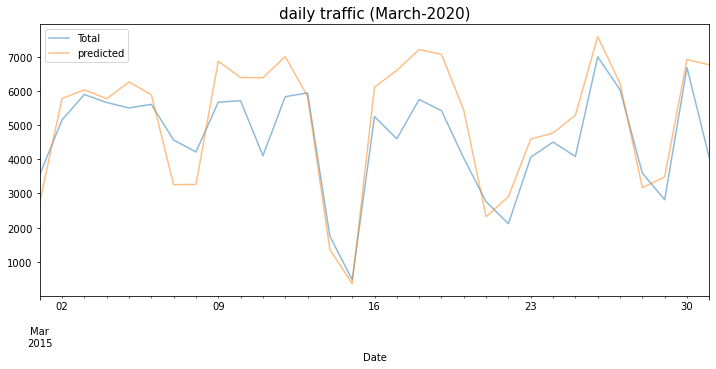

In [86]:
'March-2015'
daily[(daily.index.year==2015) & (daily.index.month==3)][['Total','predicted']].plot(alpha=0.5, figsize=(12,5))
plt.title('daily traffic (March-2020)', fontsize=15)

Text(0.5, 1.0, 'Precipitation (March-2020)')

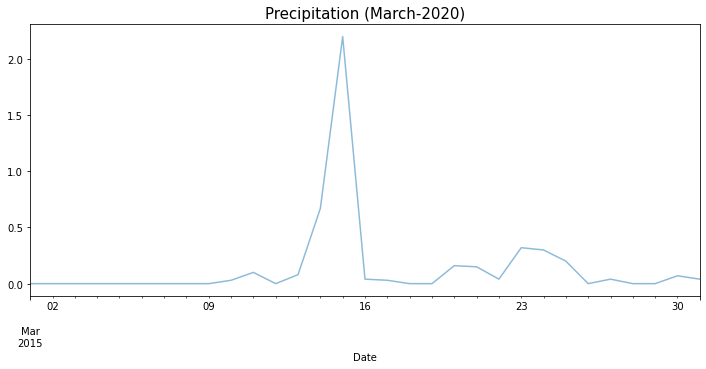

In [87]:
# March-2015, precipitation
daily[(daily.index.year==2015) & (daily.index.month==3)]['PRCP'].plot(alpha=0.5, figsize=(12,5))
plt.title('Precipitation (March-2020)', fontsize=15)

**Model coefficients**

In [75]:
feature_names = list(pipe['processor'].named_transformers_['encoder'].get_feature_names(['day_of_week','holiday']))+['year','daylight_hrs','AWND','PRCP','SNOW','TAVG']
feature_names

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'holiday_0.0',
 'holiday_1.0',
 'year',
 'daylight_hrs',
 'AWND',
 'PRCP',
 'SNOW',
 'TAVG']

In [78]:
polynomial_feature_names = pipe['poly_features'].get_feature_names(feature_names)

In [79]:
coefficients = pipe['reg'].coef_

In [81]:
coeff = pd.DataFrame(coefficients,polynomial_feature_names, columns=['coefficient'])
coeff

,coefficient
day_of_week_0,144.759454
day_of_week_1,178.638162
day_of_week_2,169.518414
day_of_week_3,196.428379
day_of_week_4,137.926107
...,...
PRCP TAVG^2,175.993929
SNOW^3,-5.932671
SNOW^2 TAVG,-14.630054
SNOW TAVG^2,-292.685351


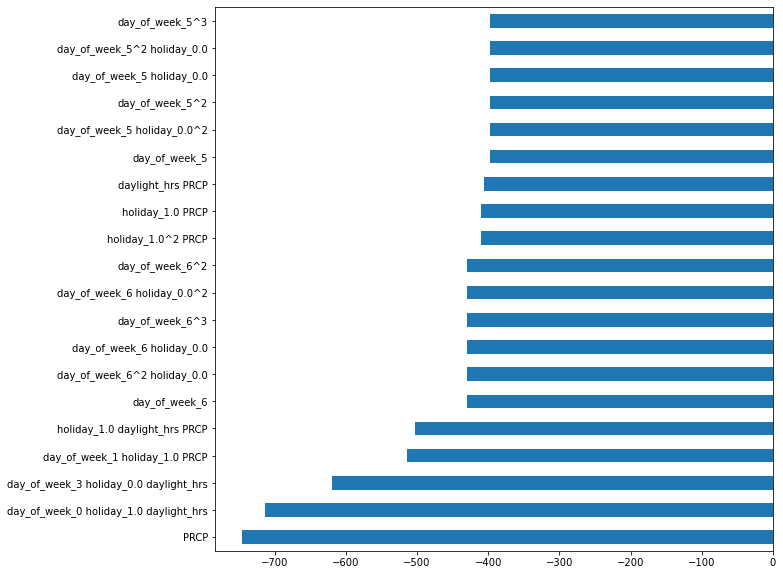

In [83]:
coeff.coefficient.sort_values(ascending=True).head(20).plot(kind='barh',figsize=(10,10))

## Data Science Fiction: 2020 with and without COVID

In [46]:
y_2020 = daily_2020['Total'] # target vector
X_2020 = daily_2020[['day_of_week','year','holiday','daylight_hrs','AWND','PRCP','SNOW','TAVG']] # feature matrix

In [47]:
daily_2020['predicted'] = pipe.predict(X_2020)

Text(0.5, 1.0, '2020 daily traffic')

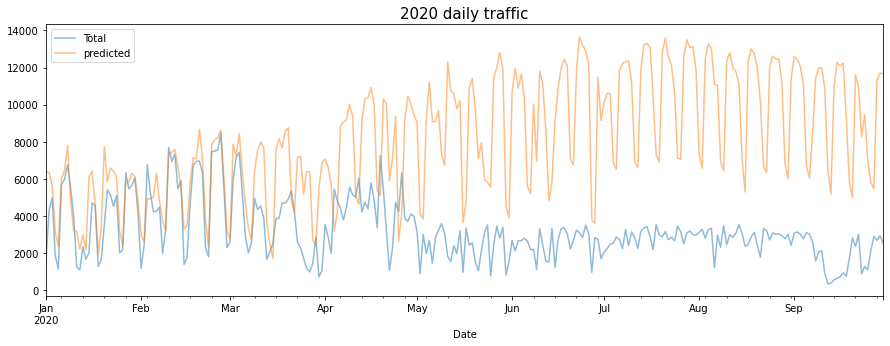

In [48]:
# plot actual and predicted values
daily_2020[['Total','predicted']].plot(alpha=0.5, figsize=(15,5))
plt.title('2020 daily traffic',fontsize=15)

In [ ]:
feature_names = list(best_pipe['processor'].named_transformers_['encoder'].get_feature_names(['day_of_week','holiday']))+['year','daylight_hrs','AWND','PRCP','SNOW','TAVG']
features_names

## Hyperparameters tuning and model evaluation

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [89]:
parameters = {
    'reg__alpha' : [0.0001, 0.001,0.01,0.1,1,10,100],
    'poly_features__degree' : [1,2,3,4]
}

In [90]:
# Grid Search
grid = GridSearchCV(pipe,parameters,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=True)

In [91]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   24.5s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['day_of_week',
                                                                          'holiday'])])),
                                       ('poly_features',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('reg', Ridge(alpha=1))]),
             n_jobs=-1,
             param_grid={'poly_features__degree': [1, 2, 3, 4],
                         'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_err

In [92]:
grid.best_params_

{'poly_features__degree': 2, 'reg__alpha': 100}

In [94]:
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
results

,mean_test_score,params
0,-1148.605349,"{'poly_features__degree': 1, 'reg__alpha': 0.0..."
1,-1148.605288,"{'poly_features__degree': 1, 'reg__alpha': 0.001}"
2,-1148.604687,"{'poly_features__degree': 1, 'reg__alpha': 0.01}"
3,-1148.598935,"{'poly_features__degree': 1, 'reg__alpha': 0.1}"
4,-1148.567393,"{'poly_features__degree': 1, 'reg__alpha': 1}"
5,-1150.526280,"{'poly_features__degree': 1, 'reg__alpha': 10}"
6,-1253.307131,"{'poly_features__degree': 1, 'reg__alpha': 100}"
7,-1237.798383,"{'poly_features__degree': 2, 'reg__alpha': 0.0..."
8,-1236.872500,"{'poly_features__degree': 2, 'reg__alpha': 0.001}"
9,-1228.388615,"{'poly_features__degree': 2, 'reg__alpha': 0.01}"


Text(0.5, 1.0, 'negative mean squared error')

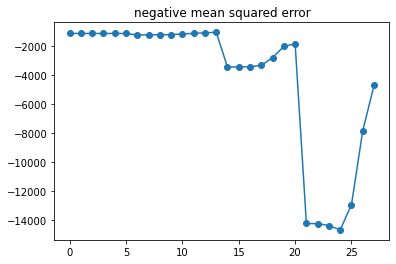

In [96]:
results.mean_test_score.plot(marker='o')
plt.title('negative root mean squared error')

In [56]:
best_pipe = grid.best_estimator_

In [98]:
# Model evaluation
from sklearn.metrics import mean_squared_error
y_test_pred = best_pipe.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_test_pred))

947.5236279262596

In [57]:
# Final prediction
daily['predicted'] = best_pipe.predict(X)

Text(0.5, 1.0, 'daily traffic')

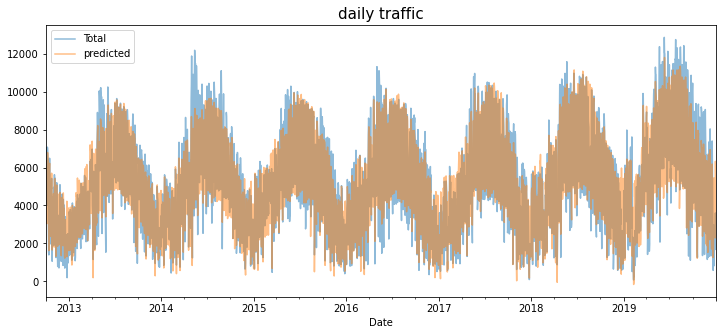

In [58]:
# plot actual and predicted values
daily[['Total','predicted']].plot(alpha=0.5, figsize=(12,5))
plt.title('daily traffic',fontsize=15)